<a href="https://colab.research.google.com/github/radhika1603/Marketing-Research-Assignment/blob/main/Reddit%20Extraction%20(Uber%20drivers)%20with%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.8 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Scraping posts from r/uberdrivers...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Saved posts to /content/uberdrivers_posts.csv
Sentiment analysis results saved to /content/uberdrivers_posts_with_sentiment.csv
Plotting sentiment over time...


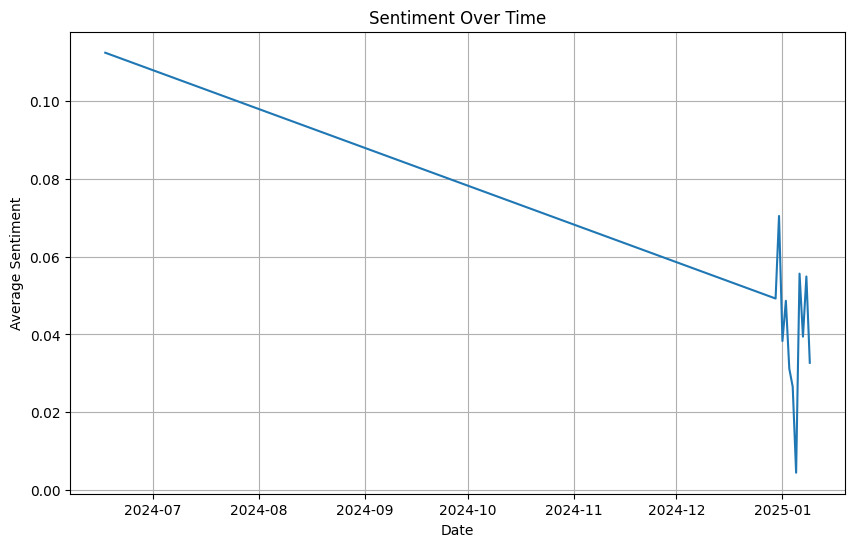

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Scraping comments for post ID: 1dhnmyb
Saved comments to /content/1dhnmyb_comments.csv


In [ ]:
import praw
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Initialize the Reddit client
def initialize_reddit():
    return praw.Reddit(
        client_id='Ay8CSy5xffiVYQgexQHDog',       # Replace with your client ID
        client_secret='KeOvB3Y7LomoGvqzQ2b_nHAK8mP4dA', # Replace with your client secret
        user_agent='Rediit'       # Replace with your user agent
    )

# Scrape subreddit posts
def scrape_posts(reddit, subreddit_name, limit=1000):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []

    for submission in subreddit.hot(limit=limit):
        posts.append({
            'title': submission.title,
            'score': submission.score,
            'id': submission.id,
            'url': submission.url,
            'num_comments': submission.num_comments,
            'created': submission.created,
            'body': submission.selftext
        })

    return pd.DataFrame(posts)

# Scrape comments for a specific post
def scrape_comments(reddit, post_id):
    submission = reddit.submission(id=post_id)
    submission.comments.replace_more(limit=None)

    comments = []
    for comment in submission.comments.list():
        comments.append({
            'comment_id': comment.id,
            'body': comment.body,
            'author': str(comment.author),
            'score': comment.score,
            'created': comment.created
        })

    return pd.DataFrame(comments)

# Perform sentiment analysis
def analyze_sentiment(text):
    if pd.isna(text):  # Handle missing or NaN values
        return 0  # Neutral sentiment
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Analyze sentiment of a CSV file
def analyze_csv_sentiment(input_csv, output_csv):
    # Load the data
    df = pd.read_csv(input_csv)

    # Apply sentiment analysis
    if 'body' in df.columns:
        df['sentiment'] = df['body'].apply(analyze_sentiment)
    else:
        print("The column 'body' is missing in the CSV. Sentiment analysis cannot be performed.")

    # Save the updated DataFrame to a new CSV
    df.to_csv(output_csv, index=False)
    print(f"Sentiment analysis results saved to {output_csv}")

    return df

# Plot sentiment over time
def plot_sentiment_over_time(df, time_column='created', sentiment_column='sentiment'):
    if time_column in df.columns and sentiment_column in df.columns:
        # Convert the time column to datetime
        df[time_column] = pd.to_datetime(df[time_column], unit='s')

        # Aggregate sentiment by date
        sentiment_over_time = df.groupby(df[time_column].dt.date)[sentiment_column].mean()

        # Plot the data
        plt.figure(figsize=(10, 6))
        sentiment_over_time.plot()
        plt.title('Sentiment Over Time')
        plt.xlabel('Date')
        plt.ylabel('Average Sentiment')
        plt.grid(True)
        plt.show()
    else:
        print(f"Missing columns '{time_column}' or '{sentiment_column}' in the DataFrame.")

# Main function
def main():
    reddit = initialize_reddit()

    # Scrape subreddit posts
    subreddit_name = 'uberdrivers'
    print(f"Scraping posts from r/{subreddit_name}...")
    posts_df = scrape_posts(reddit, subreddit_name, limit=1000)

    # Save posts to a CSV file
    posts_file = '/content/uberdrivers_posts.csv'
    posts_df.to_csv(posts_file, index=False)
    print(f"Saved posts to {posts_file}")

    # Perform sentiment analysis on the saved CSV file
    output_file = '/content/uberdrivers_posts_with_sentiment.csv'
    posts_with_sentiment = analyze_csv_sentiment(posts_file, output_file)

    # Plot sentiment over time
    print("Plotting sentiment over time...")
    plot_sentiment_over_time(posts_with_sentiment)

    # Scrape comments for the first post as an example
    if not posts_df.empty:
        first_post_id = posts_df.iloc[0]['id']
        print(f"Scraping comments for post ID: {first_post_id}")
        comments_df = scrape_comments(reddit, first_post_id)

        # Save comments to a CSV file
        comments_file = f'/content/{first_post_id}_comments.csv'
        comments_df.to_csv(comments_file, index=False)
        print(f"Saved comments to {comments_file}")

if __name__ == '__main__':
    main()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load data from Google Colab
def load_data_from_colab(file_path):
    from google.colab import files
    uploaded = files.upload()  # Allow user to upload file
    return pd.read_csv(file_path)

# Step 2: Preprocess data
def preprocess_data(data):
    # Identify categorical variables
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('y')  # Exclude the dependent variable

    # Convert categorical variables to dummy variables
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    # Convert dependent variable 'y' to binary (1 for 'yes', 0 for 'no')
    data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

    # Split data into independent (X) and dependent (y) variables
    X = data.drop(['y'], axis=1)  # All variables except 'y'
    y = data['y']  # Target variable

    return X, y

# Step 3: Train logistic regression model
def train_logistic_regression(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize logistic regression model
    model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return model

# Step 4: Main function to execute the steps
def main():
    file_path = 'your_file.csv'  # Replace with your file name in Colab
    data = load_data_from_colab(file_path)

    # Preprocess the data
    X, y = preprocess_data(data)

    # Train the logistic regression model
    model = train_logistic_regression(X, y)

    # Display the coefficients of the logistic regression model
    print("Feature Coefficients:\n")
    for feature, coef in zip(X.columns, model.coef_[0]):
        print(f"{feature}: {coef}")

# Execute the main function
if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_data(df):
    # Create copy
    df = df.copy()

    # Handle date columns if they exist
    date_columns = ['dateCrawled', 'lastSeen']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format='%d-%m-%Y %H:%M', dayfirst=True)

    # Select features for regression
    numeric_columns = ['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']
    categorical_columns = ['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox',
                         'model', 'fuelType', 'brand', 'notRepairedDamage']

    # Handle missing values
    for col in numeric_columns:
        if col in df.columns:
            df[col].fillna(df[col].median(), inplace=True)

    for col in categorical_columns:
        if col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)

    # Create dummy variables for existing categorical columns
    categorical_columns_to_dummy = [col for col in categorical_columns if col in df.columns]
    df_dummy = pd.get_dummies(df[categorical_columns_to_dummy], drop_first=True)

    # Combine features
    numeric_features = [col for col in numeric_columns if col in df.columns]
    X = pd.concat([df[numeric_features], df_dummy], axis=1)
    y = df['price']

    return X, y

def run_regression_analysis(X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions and metrics
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Feature importance
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', ascending=False)

    # Check regression assumptions
    residuals = y_test - y_pred

    # Plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Residual plot
    ax1.scatter(y_pred, residuals)
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.set_xlabel('Predicted Values')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residual Plot')

    # QQ plot
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title('Normal Q-Q Plot')

    plt.tight_layout()

    return model, r2, rmse, coef_df, residuals, y_test, y_pred

# Example usage:
# df = pd.read_csv('your_data.csv')
# X, y = prepare_data(df)
# model, r2, rmse, coef_df, residuals, y_test, y_pred = run_regression_analysis(X, y)

# Print results
# print(f"\nR-squared: {r2:.3f}")
# print(f"RMSE: {rmse:.2f}")
# print("\nTop 10 most influential features:")
# print(coef_df.head(10))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_data(df):
    # Create copy
    df = df.copy()

    # Handle date columns if they exist
    date_columns = ['dateCrawled', 'lastSeen']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format='%d-%m-%Y %H:%M', dayfirst=True)

    # Select features for regression
    numeric_columns = ['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']
    categorical_columns = ['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox',
                         'model', 'fuelType', 'brand', 'notRepairedDamage']

    # Handle missing values
    for col in numeric_columns:
        if col in df.columns:
            df[col].fillna(df[col].median(), inplace=True)

    for col in categorical_columns:
        if col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)

    # Create dummy variables for existing categorical columns
    categorical_columns_to_dummy = [col for col in categorical_columns if col in df.columns]
    df_dummy = pd.get_dummies(df[categorical_columns_to_dummy], drop_first=True)

    # Combine features
    numeric_features = [col for col in numeric_columns if col in df.columns]
    X = pd.concat([df[numeric_features], df_dummy], axis=1)
    y = df['price']

    return X, y

def run_regression_analysis(X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions and metrics
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Feature importance
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', ascending=False)

    # Check regression assumptions
    residuals = y_test - y_pred

    # Plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Residual plot
    ax1.scatter(y_pred, residuals)
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.set_xlabel('Predicted Values')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residual Plot')

    # QQ plot
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title('Normal Q-Q Plot')

    plt.tight_layout()

    return model, r2, rmse, coef_df, residuals, y_test, y_pred

# Example usage:
# df = pd.read_csv('your_data.csv')
# X, y = prepare_data(df)
# model, r2, rmse, coef_df, residuals, y_test, y_pred = run_regression_analysis(X, y)

# Print results
# print(f"\nR-squared: {r2:.3f}")
# print(f"RMSE: {rmse:.2f}")
# print("\nTop 10 most influential features:")
# print(coef_df.head(10))

In [ ]:
pip install praw pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.9 MB/s eta 0:00:00


In [ ]:
import praw
import pandas as pd
from datetime import datetime
import time

def initialize_reddit():
    return praw.Reddit(
        client_id='iiQh2bW94SbzkOEYv6Z1xg',
        client_secret='Neo3apc4AfyNlV587q_1rQGg_GMJ5A',
        user_agent='market app'
    )

def scrape_subreddit(subreddit_name, limit=100):
    reddit = initialize_reddit()
    subreddit = reddit.subreddit(subreddit_name)
    posts_data = []
    comments_data = []

    for post in subreddit.hot(limit=limit):
        post_data = {
            'post_id': post.id,
            'title': post.title,
            'text': post.selftext,
            'score': post.score,
            'created_utc': datetime.fromtimestamp(post.created_utc),
            'num_comments': post.num_comments,
            'author': str(post.author),
            'url': post.url
        }
        posts_data.append(post_data)

        post.comments.replace_more(limit=None)
        for comment in post.comments.list():
            comment_data = {
                'comment_id': comment.id,
                'post_id': post.id,
                'text': comment.body,
                'score': comment.score,
                'author': str(comment.author),
                'created_utc': datetime.fromtimestamp(comment.created_utc),
                'parent_id': comment.parent_id
            }
            comments_data.append(comment_data)
        time.sleep(1)

    return pd.DataFrame(posts_data), pd.DataFrame(comments_data)

def save_data(posts_df, comments_df):
    posts_df.to_csv('uber_drivers_posts.csv', index=False)
    comments_df.to_csv('uber_drivers_comments.csv', index=False)
    print(f"Saved {len(posts_df)} posts and {len(comments_df)} comments")

# Execute scraping
posts_df, comments_df = scrape_subreddit('uberdrivers')
save_data(posts_df, comments_df)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Saved 100 posts and 2439 comments


In [ ]:
import praw
import pandas as pd
import asyncio
from datetime import datetime
import nest_asyncio
nest_asyncio.apply()

async def initialize_reddit():
    return praw.Reddit(
        client_id='iiQh2bW94SbzkOEYv6Z1xg',
        client_secret='Neo3apc4AfyNlV587q_1rQGg_GMJ5A',
        user_agent='market app'
    )

async def scrape_subreddit(subreddit_name, limit=100):
    reddit = await initialize_reddit()
    subreddit = await reddit.subreddit(subreddit_name)
    posts_data = []
    comments_data = []

    async for post in subreddit.hot(limit=limit):
        post_data = {
            'post_id': post.id,
            'title': post.title,
            'text': post.selftext,
            'score': post.score,
            'created_utc': datetime.fromtimestamp(post.created_utc),
            'num_comments': post.num_comments,
            'author': str(post.author),
            'url': post.url
        }
        posts_data.append(post_data)

        await post.comments.replace_more(limit=None)
        async for comment in post.comments.list():
            comment_data = {
                'comment_id': comment.id,
                'post_id': post.id,
                'text': comment.body,
                'score': comment.score,
                'author': str(comment.author),
                'created_utc': datetime.fromtimestamp(comment.created_utc),
                'parent_id': comment.parent_id
            }
            comments_data.append(comment_data)
        await asyncio.sleep(1)

    await reddit.close()
    return pd.DataFrame(posts_data), pd.DataFrame(comments_data)

def save_data(posts_df, comments_df):
    posts_df.to_csv('uber_drivers_posts.csv', index=False)
    comments_df.to_csv('uber_drivers_comments.csv', index=False)
    print(f"Saved {len(posts_df)} posts and {len(comments_df)} comments")

# Execute scraping
async def main():
    posts_df, comments_df = await scrape_subreddit('uberdrivers')
    save_data(posts_df, comments_df)

asyncio.run(main())

TypeError: object Subreddit can't be used in 'await' expression